In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings(action='ignore')
burnoutDf = pd.read_csv('C:/Users/Jhansee Ram/Downloads/employee_burnout_analysis.csv')
burnoutDf.info()
burnoutDf = burnoutDf.drop('Employee ID', axis=1)
missing_target_rows = burnoutDf.loc[burnoutDf['Burn Rate'].isna(), :].index
burnoutDf = burnoutDf.drop(missing_target_rows, axis=0).reset_index(drop=True)
for column in ['Resource Allocation', 'Mental Fatigue Score']:
    burnoutDf[column] = burnoutDf[column].fillna(burnoutDf[column].mean())

burnoutDf['Date of Joining'] = pd.to_datetime(burnoutDf['Date of Joining'])
burnoutDf['Join Month'] = burnoutDf['Date of Joining'].apply(lambda x: x.month)
burnoutDf['Join Day'] = burnoutDf['Date of Joining'].apply(lambda x: x.day)
burnoutDf = burnoutDf.drop('Date of Joining', axis=1)
burnoutDf['Gender'] = burnoutDf['Gender'].replace({'Female': 0, 'Male': 1})
burnoutDf['Company Type'] = burnoutDf['Company Type'].replace({'Product': 0, 'Service': 1})
burnoutDf['WFH Setup Available'] = burnoutDf['WFH Setup Available'].replace({'No': 0, 'Yes': 1})
y = burnoutDf['Burn Rate']
X = burnoutDf.drop('Burn Rate', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

models = {
    "                     Linear Regression": LinearRegression(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                         Random Forest": RandomForestRegressor()
}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


                     Linear Regression Score: 87.075%
                   K-Nearest Neighbors Score: 85.575%
                         Random Forest Score: 89.607%


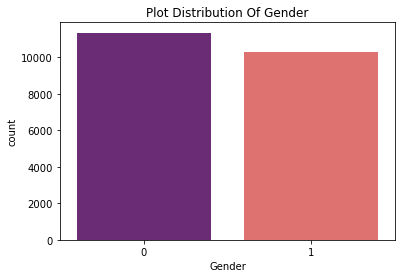

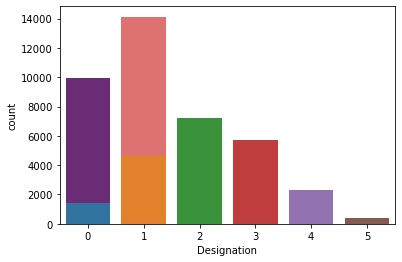

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)

for name, model in models.items():
    print(name + " Score: {:.3%}".format(model.score(X_test, y_test)))

def visualize_data(df):
    sns.countplot(x="Gender", data=df, palette='magma')
    plt.title("Plot Distribution Of Gender")
    plt.show()
    sns.countplot(x="Company Type", data=df, palette='magma')
    sns.countplot(x="WFH Setup Available", data=df, palette='magma')
    sns.countplot(x="Designation", data=df)
visualize_data(burnoutDf)

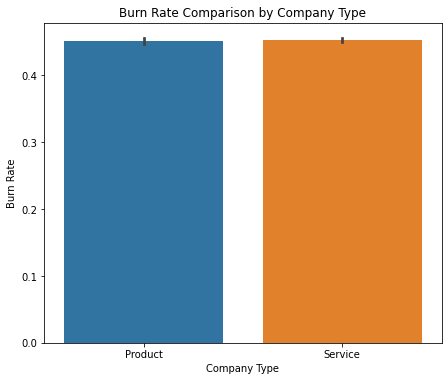

In [4]:
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 2, 2)
sns.barplot(data=burnoutDf, x='Company Type', y='Burn Rate')
plt.title('Burn Rate Comparison by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Burn Rate')
plt.xticks([0, 1], ['Product', 'Service'])
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Burn Rate')

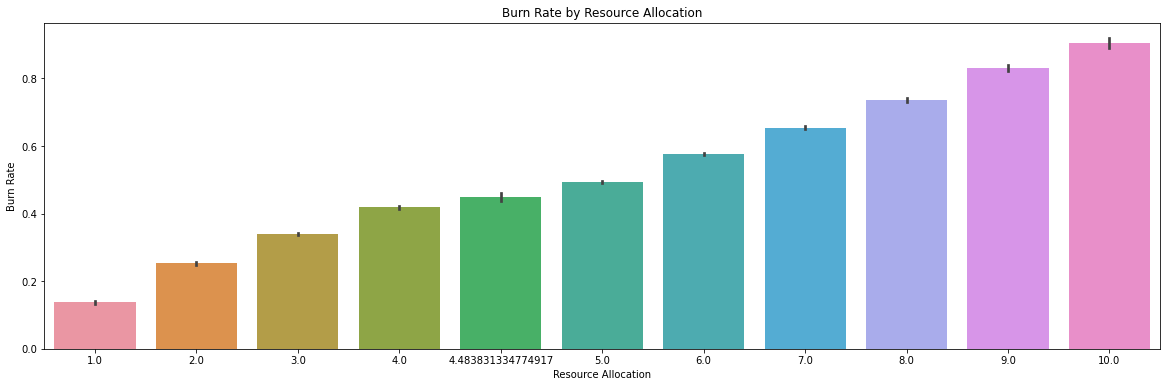

In [11]:
plt.figure(figsize=(20, 6))
plt.subplots_adjust(wspace=0.1)
sns.barplot(data=burnoutDf, x='Resource Allocation', y='Burn Rate')
plt.title('Burn Rate by Resource Allocation')
plt.xlabel('Resource Allocation')
plt.ylabel('Burn Rate')

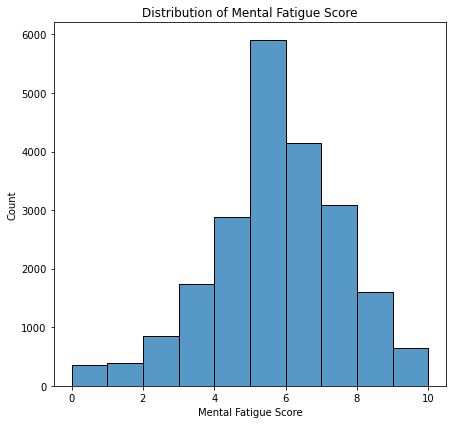

In [13]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)
plt.subplot(1, 2, 1)
sns.histplot(data=burnoutDf, x='Mental Fatigue Score', bins=10)
plt.title('Distribution of Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

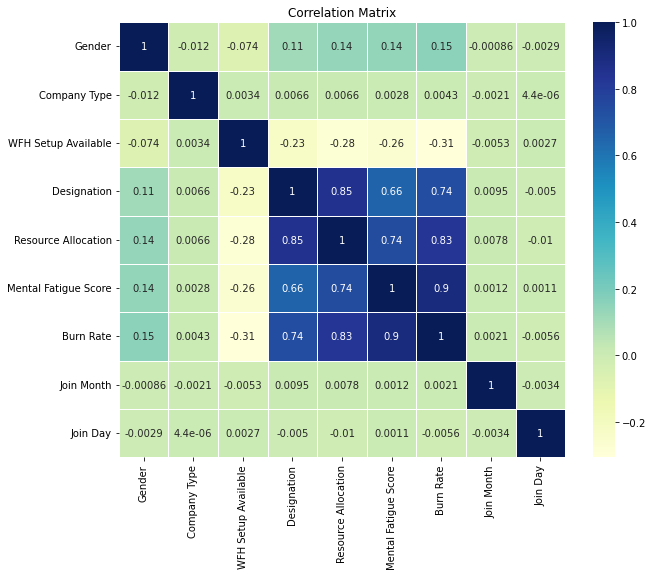

In [15]:
correlation_matrix = burnoutDf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
